<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,78.345773,31.512223,46.646612,-25.068156,177.382318,229.998888,-52.616570
1,0.0,1.0,95.837206,35.795618,65.018997,83.832801,71.780282,362.264905,263.820160,98.444745
2,0.0,2.0,48.563620,42.464114,57.927547,49.340340,27.222429,235.518049,218.675299,16.842751
3,0.0,3.0,39.954498,60.470564,64.981390,46.882897,42.509001,264.798351,241.421912,23.376439
4,0.0,4.0,54.374626,76.624742,93.626333,26.002308,-257.005112,3.622897,309.739341,-306.116444
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.075948,53.821711,98.102481,99.406777,174.660916,526.067832,392.878708,133.189125
119996,999.0,116.0,61.510982,72.853669,37.592646,95.930403,195.588488,473.476187,331.661372,141.814816
119997,999.0,117.0,48.168129,21.865138,44.255657,77.995902,-28.040878,174.243948,209.026629,-34.782681
119998,999.0,118.0,47.237580,91.836327,54.576714,95.880933,164.145446,463.677001,364.435246,99.241755


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,78.345773,31.512223,46.646612,-25.068156,177.382318,229.998888,-52.616570
1,0.0,1.0,95.837206,35.795618,65.018997,83.832801,71.780282,362.264905,263.820160,98.444745
2,0.0,2.0,48.563620,42.464114,57.927547,49.340340,27.222429,235.518049,218.675299,16.842751
3,0.0,3.0,39.954498,60.470564,64.981390,46.882897,42.509001,264.798351,241.421912,23.376439
4,0.0,4.0,54.374626,76.624742,93.626333,26.002308,-257.005112,3.622897,309.739341,-306.116444
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.075948,53.821711,98.102481,99.406777,174.660916,526.067832,392.878708,133.189125
119996,999.0,116.0,61.510982,72.853669,37.592646,95.930403,195.588488,473.476187,331.661372,141.814816
119997,999.0,117.0,48.168129,21.865138,44.255657,77.995902,-28.040878,174.243948,209.026629,-34.782681
119998,999.0,118.0,47.237580,91.836327,54.576714,95.880933,164.145446,463.677001,364.435246,99.241755


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

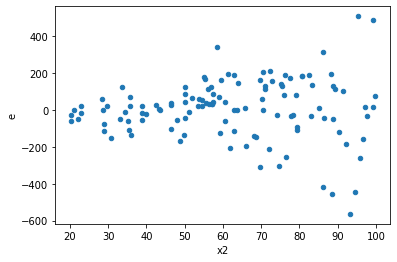

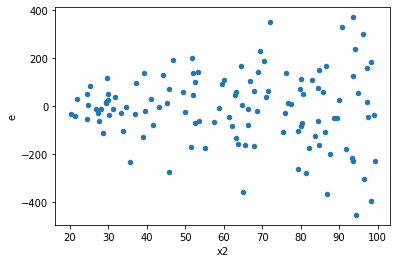

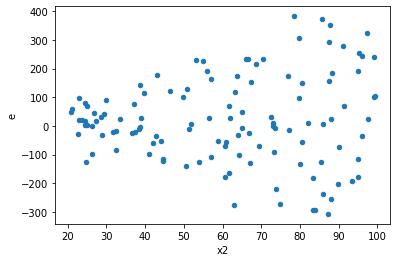

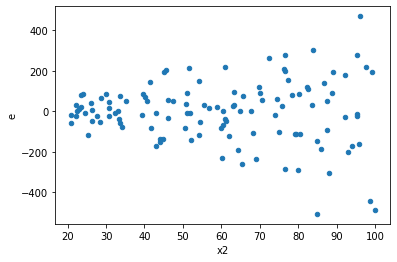

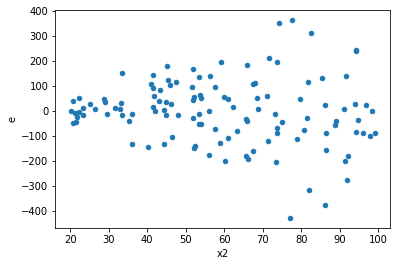

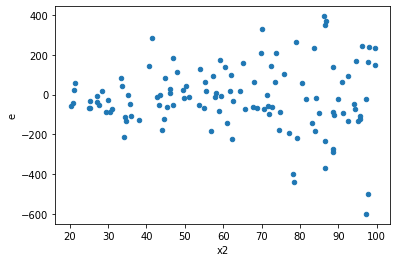

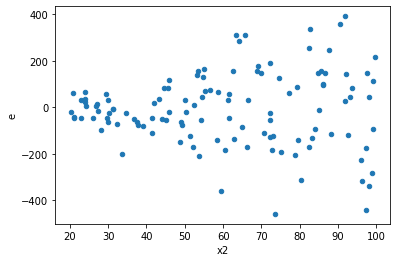

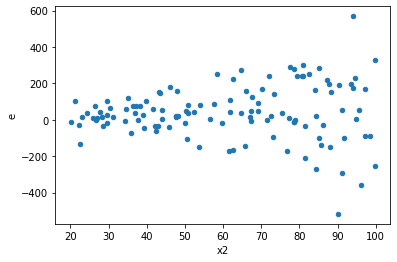

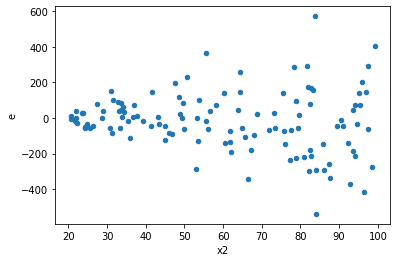

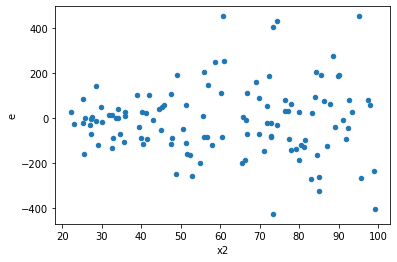

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,51.0,61.0,1181108.8763854213,1921828.214197825,23158.99757618473,31505.38056062008,1.3603948295680228,0.2489674296919142,0.8755162851540429,0.1244837148459571,Reject005=1 : Homoscedasticity
7.0,57.0,55.0,1097161.6822181556,1300542.610422502,19248.4505652308,23646.229280409127,1.2284744270856898,0.44507746654184555,0.7774612667290772,0.22253873327092277,Reject005=1 : Homoscedasticity
8.0,59.0,53.0,471221.06482571777,2662471.249382286,7986.797708910471,50235.3065921186,6.289793284243769,2.2581247982600416e-10,0.9999999998870938,1.1290623991300208e-10,Reject005=0 : Heteroscedasticity
10.0,61.0,51.0,1241261.9157389086,1822610.6754517902,20348.555995719813,35737.46422454491,1.7562653699880253,0.040253269822787985,0.979873365088606,0.020126634911393992,Reject005=0 : Heteroscedasticity
11.0,57.0,55.0,457539.5729856394,1531429.5168925112,8027.010052379638,27844.173034409294,3.468810036702867,7.50942926375231e-06,0.9999962452853681,3.754714631876155e-06,Reject005=0 : Heteroscedasticity
14.0,59.0,53.0,917832.9650134991,2567220.923696124,15556.490932432189,48438.130635775924,3.113692595982045,4.57687658892425e-05,0.9999771156170554,2.288438294462125e-05,Reject005=0 : Heteroscedasticity
15.0,54.0,58.0,447163.27706871415,2723536.849009111,8280.80142719841,46957.53187946743,5.670650635968006,6.772165050961121e-10,0.9999999996613917,3.3860825254805604e-10,Reject005=0 : Heteroscedasticity
16.0,57.0,55.0,979316.9887829178,1366011.1482099774,17180.999803209084,24836.5663310905,1.4455832964069706,0.17207320765900125,0.9139633961704994,0.08603660382950062,Reject005=1 : Homoscedasticity
18.0,63.0,49.0,1094849.6189660898,984377.1976843321,17378.565380414122,20089.33056498637,1.1559832543845832,0.601252341496995,0.6993738292515025,0.3006261707484975,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,60.0,1478442.3503869656,1506683.9218963622,28431.583661287797,25111.398698272704,0.8832219477265408,0.6497161243820537,Reject005=1 : Homoscedasticity
1.0,64.0,48.0,2062022.743483269,414714.58198634937,32219.105366926076,8639.887124715611,0.2681603671585719,1.254566465741332e-06,Reject005=0 : Heteroscedasticity
2.0,48.0,64.0,1358714.6092965386,1188224.8294847447,28306.554360344555,18566.012960699136,0.6558909545949112,0.12821018098449094,Reject005=1 : Homoscedasticity
3.0,68.0,44.0,1929147.7622767787,814719.7958840132,28369.82003348204,18516.358997363935,0.6526780563116348,0.11183792780022161,Reject005=1 : Homoscedasticity
4.0,54.0,58.0,914981.4838284006,901096.1743747348,16944.10155237779,15536.140937495427,0.9169055608802827,0.7493243428055871,Reject005=1 : Homoscedasticity
5.0,51.0,61.0,1181108.8763854213,1921828.214197825,23158.99757618473,31505.38056062008,1.3603948295680228,0.2489674296919142,Reject005=1 : Homoscedasticity
6.0,50.0,62.0,1706282.0733782782,1001710.0802860614,34125.64146756556,16156.61419816228,0.47344499629459574,0.007063992385165256,Reject005=0 : Heteroscedasticity
7.0,57.0,55.0,1097161.6822181556,1300542.610422502,19248.4505652308,23646.229280409127,1.2284744270856898,0.44507746654184555,Reject005=1 : Homoscedasticity
8.0,59.0,53.0,471221.06482571777,2662471.249382286,7986.797708910471,50235.3065921186,6.289793284243769,2.2581247982600416e-10,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      530
Reject005=0 : Heteroscedasticity    470
Name: Result_test, dtype: int64